# <h1 style="text-align:center; color:blue;">Preprocessing part 2</h1>

# <h3 style="text-align:center; color:cyan;">3- Encoding categorical values into numerical format</h3>

- There are several methods to encode categorical values into numerical format, such as one-hot encoding, ordinal encoding, and using tools like LabelEncoder. In this section, we will focus on LabelEncoder, which assigns each unique category in a feature to an integer value. This is particularly useful when the categorical variable is ordinal or when a simple integer mapping is sufficient.


!["Label Encoding"](https://miro.medium.com/v2/resize:fit:1024/1*fKzvuNxDRQKUT6D7BG9FBQ.png)

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Generate sample data
data: dict = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Green', 'Red'],
    'Size': ['S', 'M', 'L', 'M', 'S', 'L', 'M', 'L'],
    'Quantity': [5, 3, 6, 2, 7, 4, 5, 3],
    'Price': [10.5, 12.0, 9.8, 11.2, 10.0, 13.5, 12.3, 9.9]
}
df: pd.DataFrame = pd.DataFrame(data)
print("Original DataFrame:")
df


Original DataFrame:


,Color,Size,Quantity,Price
0,Red,S,5,10.5
1,Blue,M,3,12.0
2,Green,L,6,9.8
3,Blue,M,2,11.2
4,Red,S,7,10.0
5,Green,L,4,13.5
6,Green,M,5,12.3
7,Red,L,3,9.9


In [14]:
# Split the DataFrame into categorical and numerical parts
categorical_df: pd.DataFrame = df.select_dtypes('object')
numerical_df: pd.DataFrame = df.select_dtypes('number')

print("\nCategorical DataFrame:")
categorical_df



Categorical DataFrame:


,Color,Size
0,Red,S
1,Blue,M
2,Green,L
3,Blue,M
4,Red,S
5,Green,L
6,Green,M
7,Red,L


In [15]:
print("\nNumerical DataFrame:")
numerical_df


Numerical DataFrame:


,Quantity,Price
0,5,10.5
1,3,12.0
2,6,9.8
3,2,11.2
4,7,10.0
5,4,13.5
6,5,12.3
7,3,9.9


In [17]:
# get the corresponding columns for the label encoder
categorical_cols: list[str] = categorical_df.columns.to_list()

# Use the same LabelEncoder for both categorical columns
le: LabelEncoder = LabelEncoder()

for col in categorical_cols:  # Use only on categorical data
    df[col] = le.fit_transform(df[col])

print("\nDataFrame after Label Encoding:")
df


DataFrame after Label Encoding:


,Color,Size,Quantity,Price
0,2,2,5,10.5
1,0,1,3,12.0
2,1,0,6,9.8
3,0,1,2,11.2
4,2,2,7,10.0
5,1,0,4,13.5
6,1,1,5,12.3
7,2,0,3,9.9


# <h3 style="text-align:center; color:yellow;">4- Scaling values</h3>

- In machine learning, feature scaling is an important preprocessing step that ensures numerical features are on a similar scale. 
- This helps many algorithms perform better and converge faster. There are several types of scalers, such as MinMaxScaler, RobustScaler, and StandardScaler.
- Here, we will focus on the StandardScaler.

- The StandardScaler standardizes features by removing the mean and scaling to unit variance.
- This means each feature will have a mean of 0 and a standard deviation of 1 after scaling.
- Standardization is especially useful when the data follows a Gaussian (normal) distribution.


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler: StandardScaler = StandardScaler()

# get the corresponding columns for the Standard scaler
numeric_cols: list[str] = numerical_df.columns.to_list()

# Fit the scaler on the numerical columns and transform them
for col in numeric_cols: # This is only applicable on number and never use on encoded categorical data
    df[[col]] = scaler.fit_transform(df[[col]])  # note that we used a double brackets because the scalers takes a 2D array as an argument

print("\nScaled Numerical DataFrame (StandardScaler):")
df



Scaled Numerical DataFrame (StandardScaler):


,Color,Size,Quantity,Price
0,2,2,0.396526,-0.515889
1,0,1,-0.872357,0.674624
2,1,0,1.030967,-1.071462
3,0,1,-1.506798,0.039684
4,2,2,1.665408,-0.912727
5,1,0,-0.237915,1.865138
6,1,1,0.396526,0.912727
7,2,0,-0.872357,-0.992095


# <h3 style="text-align:center; color:red;">5- Analyzing correlations between features</h3>

- Correlation analysis helps us understand the relationships between different features in our dataset.
- Correlation measures how changes in one feature are associated with changes in another.
- The most common method is Pearson correlation, which measures linear relationships between numerical variables.
- Correlation values range from -1 to 1:
     - 1 means a perfect positive linear relationship,
     - -1 means a perfect negative linear relationship,
     - 0 means no linear relationship.
- Analyzing correlations can help us identify redundant features, multicollinearity, or potential predictors for our target variable.
- Visualizing the correlation matrix (e.g., with a heatmap) can make it easier to spot strong relationships.


!["Corr"](https://media.geeksforgeeks.org/wp-content/uploads/20240517160952/Corrrelation.webp)

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data: dict = {
    'A': np.random.normal(0, 1, 100),
    'B': np.random.normal(5, 2, 100),
    'C': np.random.normal(-2, 5, 100),
    'D': np.random.normal(10, 1, 100)
}
sample_df: pd.DataFrame = pd.DataFrame(data)
sample_df


,A,B,C,D
0,0.496714,2.169259,-0.211063,9.171005
1,-0.138264,4.158709,0.803923,9.439819
2,0.647689,4.314571,3.415256,10.747294
3,1.523030,3.395445,3.269010,10.610370
4,-0.234153,4.677429,-8.888347,9.979098
...,...,...,...,...
95,-1.463515,5.770635,-5.464548,9.530824
96,0.296120,3.232285,2.497999,8.286865
97,0.261055,5.307450,-0.463502,11.353872
98,0.005113,5.116417,2.064311,9.885460


In [20]:
# Calculate the correlation matrix
corr_matrix: pd.DataFrame = sample_df.corr()

print("Correlation Matrix:")
corr_matrix


Correlation Matrix:


,A,B,C,D
A,1.000000,-0.136422,0.190840,-0.170227
B,-0.136422,1.000000,-0.036632,-0.017613
C,0.190840,-0.036632,1.000000,-0.000259
D,-0.170227,-0.017613,-0.000259,1.000000


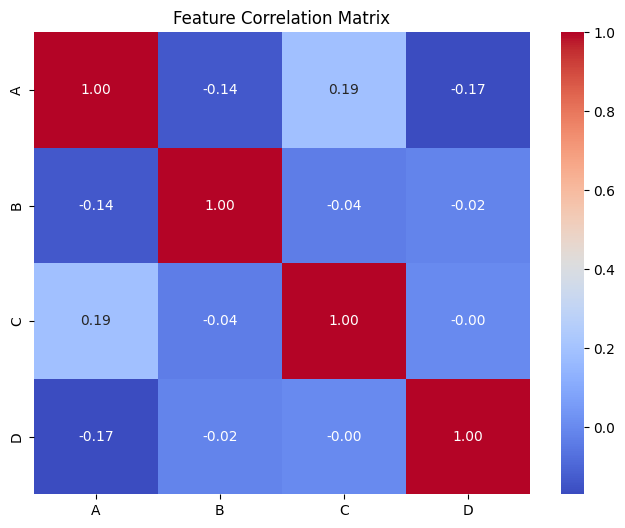

In [21]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


# <h3 style="text-align:center; color:blue;">6- Splitting the data</h3>


- In machine learning, it is important to evaluate how well a model generalizes to unseen data. 
- To do this, we typically split our dataset into two parts: a training set and a test set.
- The training set is used to train the model, while the test set is used to evaluate its performance. 
- The `train_test_split` function from `sklearn.model_selection` is commonly used for this purpose.
- It randomly splits arrays or dataframes into training and testing subsets.



In [22]:
from sklearn.model_selection import train_test_split

# Let's split sample_df into features (X) and target (y)
# For demonstration, let's assume column 'D' is the target variable
X: pd.DataFrame = sample_df.drop('D', axis=1)
y: pd.Series = sample_df['D']

# Split the data: 80% train, 20% test, random_state for reproducibility
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (80, 3)
Test features shape: (20, 3)
Training target shape: (80,)
Test target shape: (20,)
